In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Lasso, Ridge

In [5]:
# Load the dataset
df = pd.read_csv("toyotacorolla.csv")

In [6]:
# 1.Perform exploratory data analysis (EDA) to gain insights into the dataset
print(df.head())

   Price  Age_08_04     KM Fuel_Type  HP  Automatic    cc  Doors  Cylinders  \
0  13500         23  46986    Diesel  90          0  2000      3          4   
1  13750         23  72937    Diesel  90          0  2000      3          4   
2  13950         24  41711    Diesel  90          0  2000      3          4   
3  14950         26  48000    Diesel  90          0  2000      3          4   
4  13750         30  38500    Diesel  90          0  2000      3          4   

   Gears  Weight  
0      5    1165  
1      5    1165  
2      5    1165  
3      5    1165  
4      5    1170  


In [29]:
df.rename(columns={'Age_08_04': 'Age'}, inplace=True)

In [30]:
# Check for missing values
print(df.isnull().sum())

Price               0
Age                 0
KM                  0
HP                  0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Weight              0
Fuel_Type_Diesel    0
Fuel_Type_Petrol    0
dtype: int64


In [31]:
# Display summary statistics for numerical columns
print(df.describe())

              Price          Age             KM           HP    Automatic  \
count   1436.000000  1436.000000    1436.000000  1436.000000  1436.000000   
mean   10730.824513    55.947075   68533.259749   101.502089     0.055710   
std     3626.964585    18.599988   37506.448872    14.981080     0.229441   
min     4350.000000     1.000000       1.000000    69.000000     0.000000   
25%     8450.000000    44.000000   43000.000000    90.000000     0.000000   
50%     9900.000000    61.000000   63389.500000   110.000000     0.000000   
75%    11950.000000    70.000000   87020.750000   110.000000     0.000000   
max    32500.000000    80.000000  243000.000000   192.000000     1.000000   

                cc        Doors  Cylinders        Gears      Weight  
count   1436.00000  1436.000000     1436.0  1436.000000  1436.00000  
mean    1576.85585     4.033426        4.0     5.026462  1072.45961  
std      424.38677     0.952677        0.0     0.188510    52.64112  
min     1300.00000     2.0

In [32]:
# Display data types of each column
print(df.dtypes)

Price               int64
Age                 int64
KM                  int64
HP                  int64
Automatic           int64
cc                  int64
Doors               int64
Cylinders           int64
Gears               int64
Weight              int64
Fuel_Type_Diesel     bool
Fuel_Type_Petrol     bool
dtype: object


In [12]:
# Display unique values in categorical columns (e.g., FuelType)
print(df['Fuel_Type'].unique())

['Diesel' 'Petrol' 'CNG']


In [14]:
# One-hot encode the FuelType column
df = pd.get_dummies(df, columns=['Fuel_Type'], drop_first=True)

In [15]:
# Check the correlation between variables
correlation_matrix = df.corr()


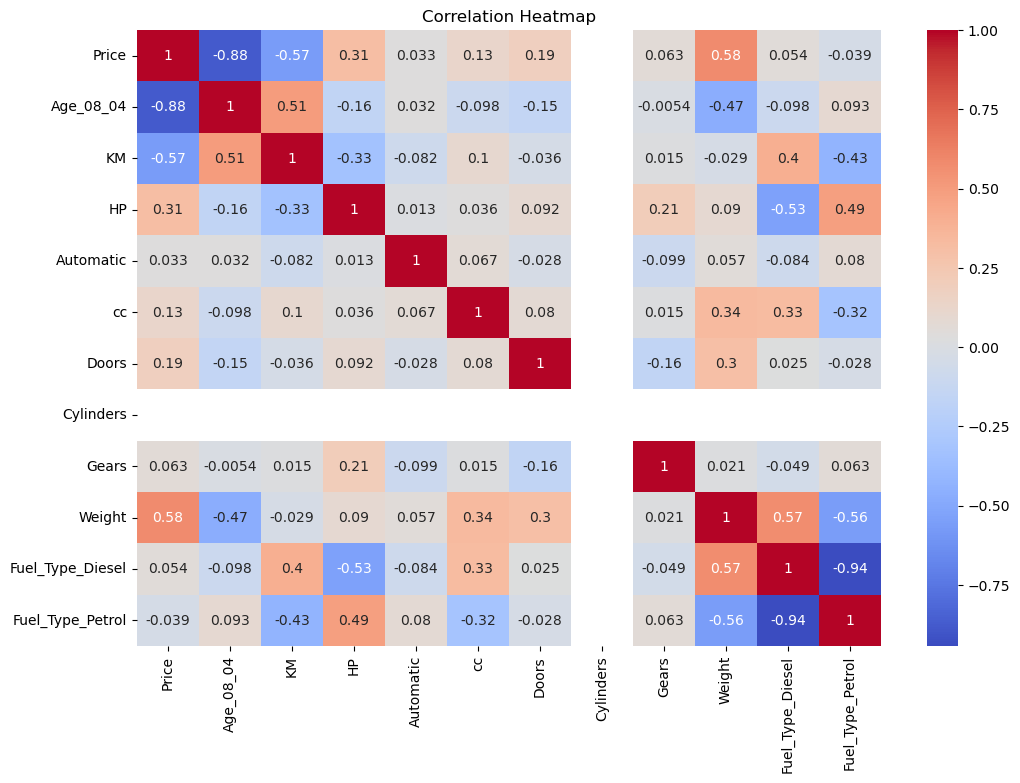

In [33]:
# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

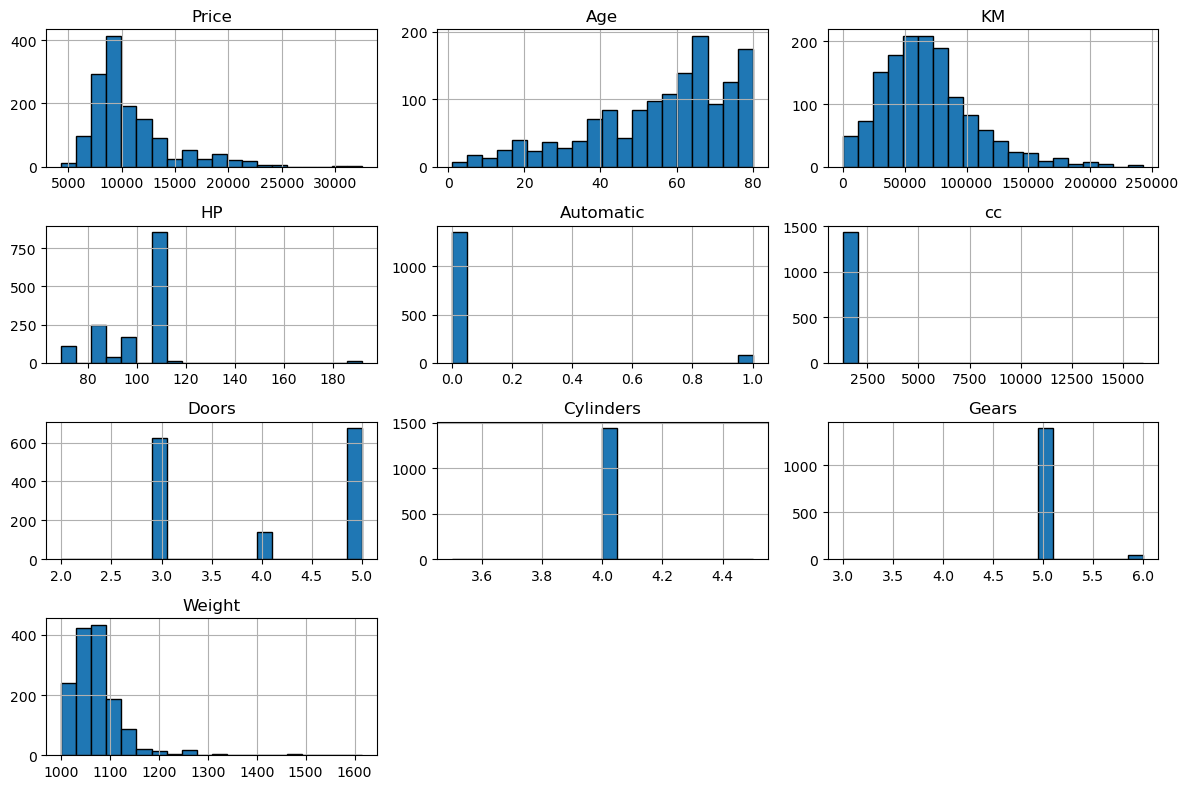

In [34]:
df.hist(bins=20, figsize=(12, 8), edgecolor='black')
plt.tight_layout()
plt.show()

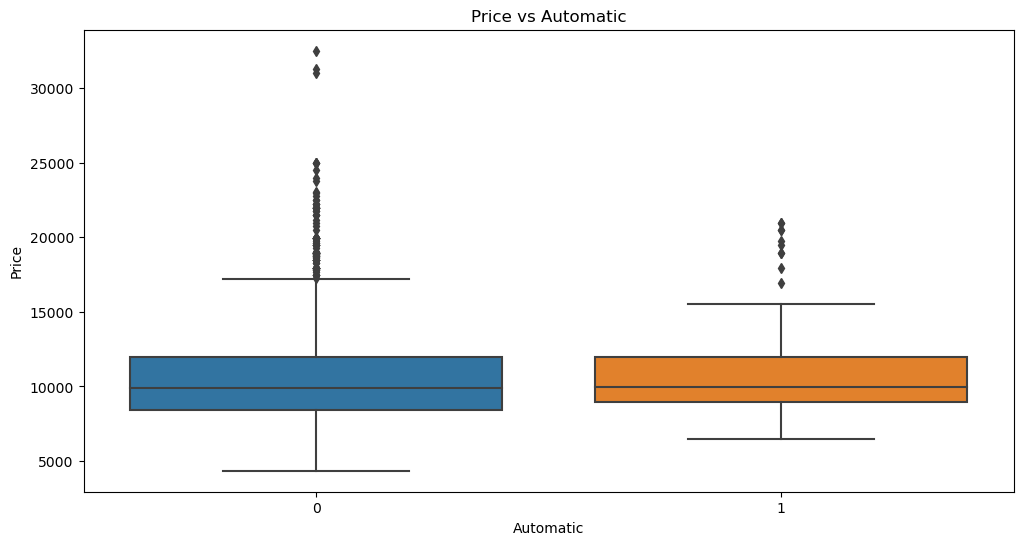

In [18]:
# Boxplot for Price vs. categorical variables like FuelType and Automatic
plt.figure(figsize=(12, 6))
sns.boxplot(x='Automatic', y='Price', data=df)
plt.title('Price vs Automatic')
plt.show()


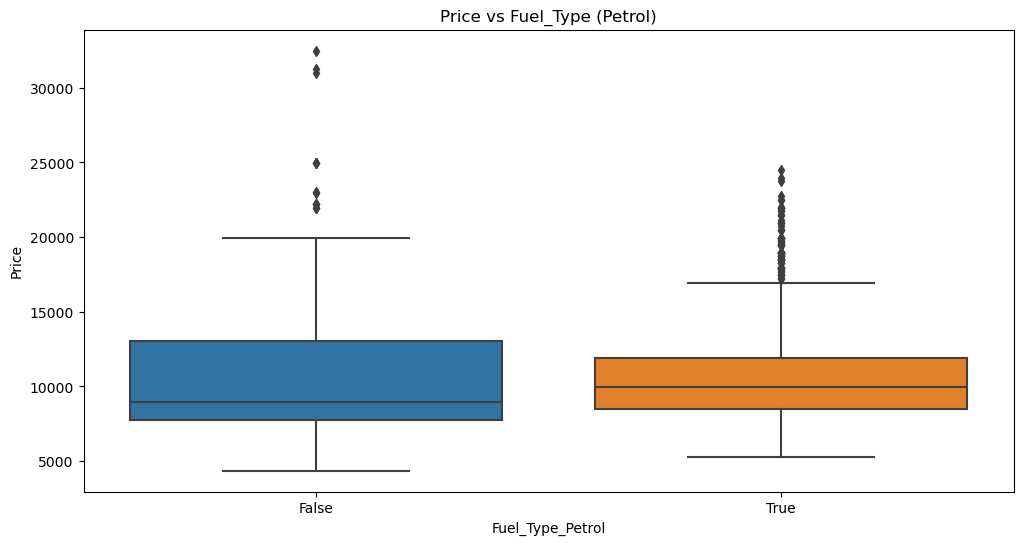

In [22]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Fuel_Type_Petrol', y='Price', data=df)
plt.title('Price vs Fuel_Type (Petrol)')
plt.show()

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
D:\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


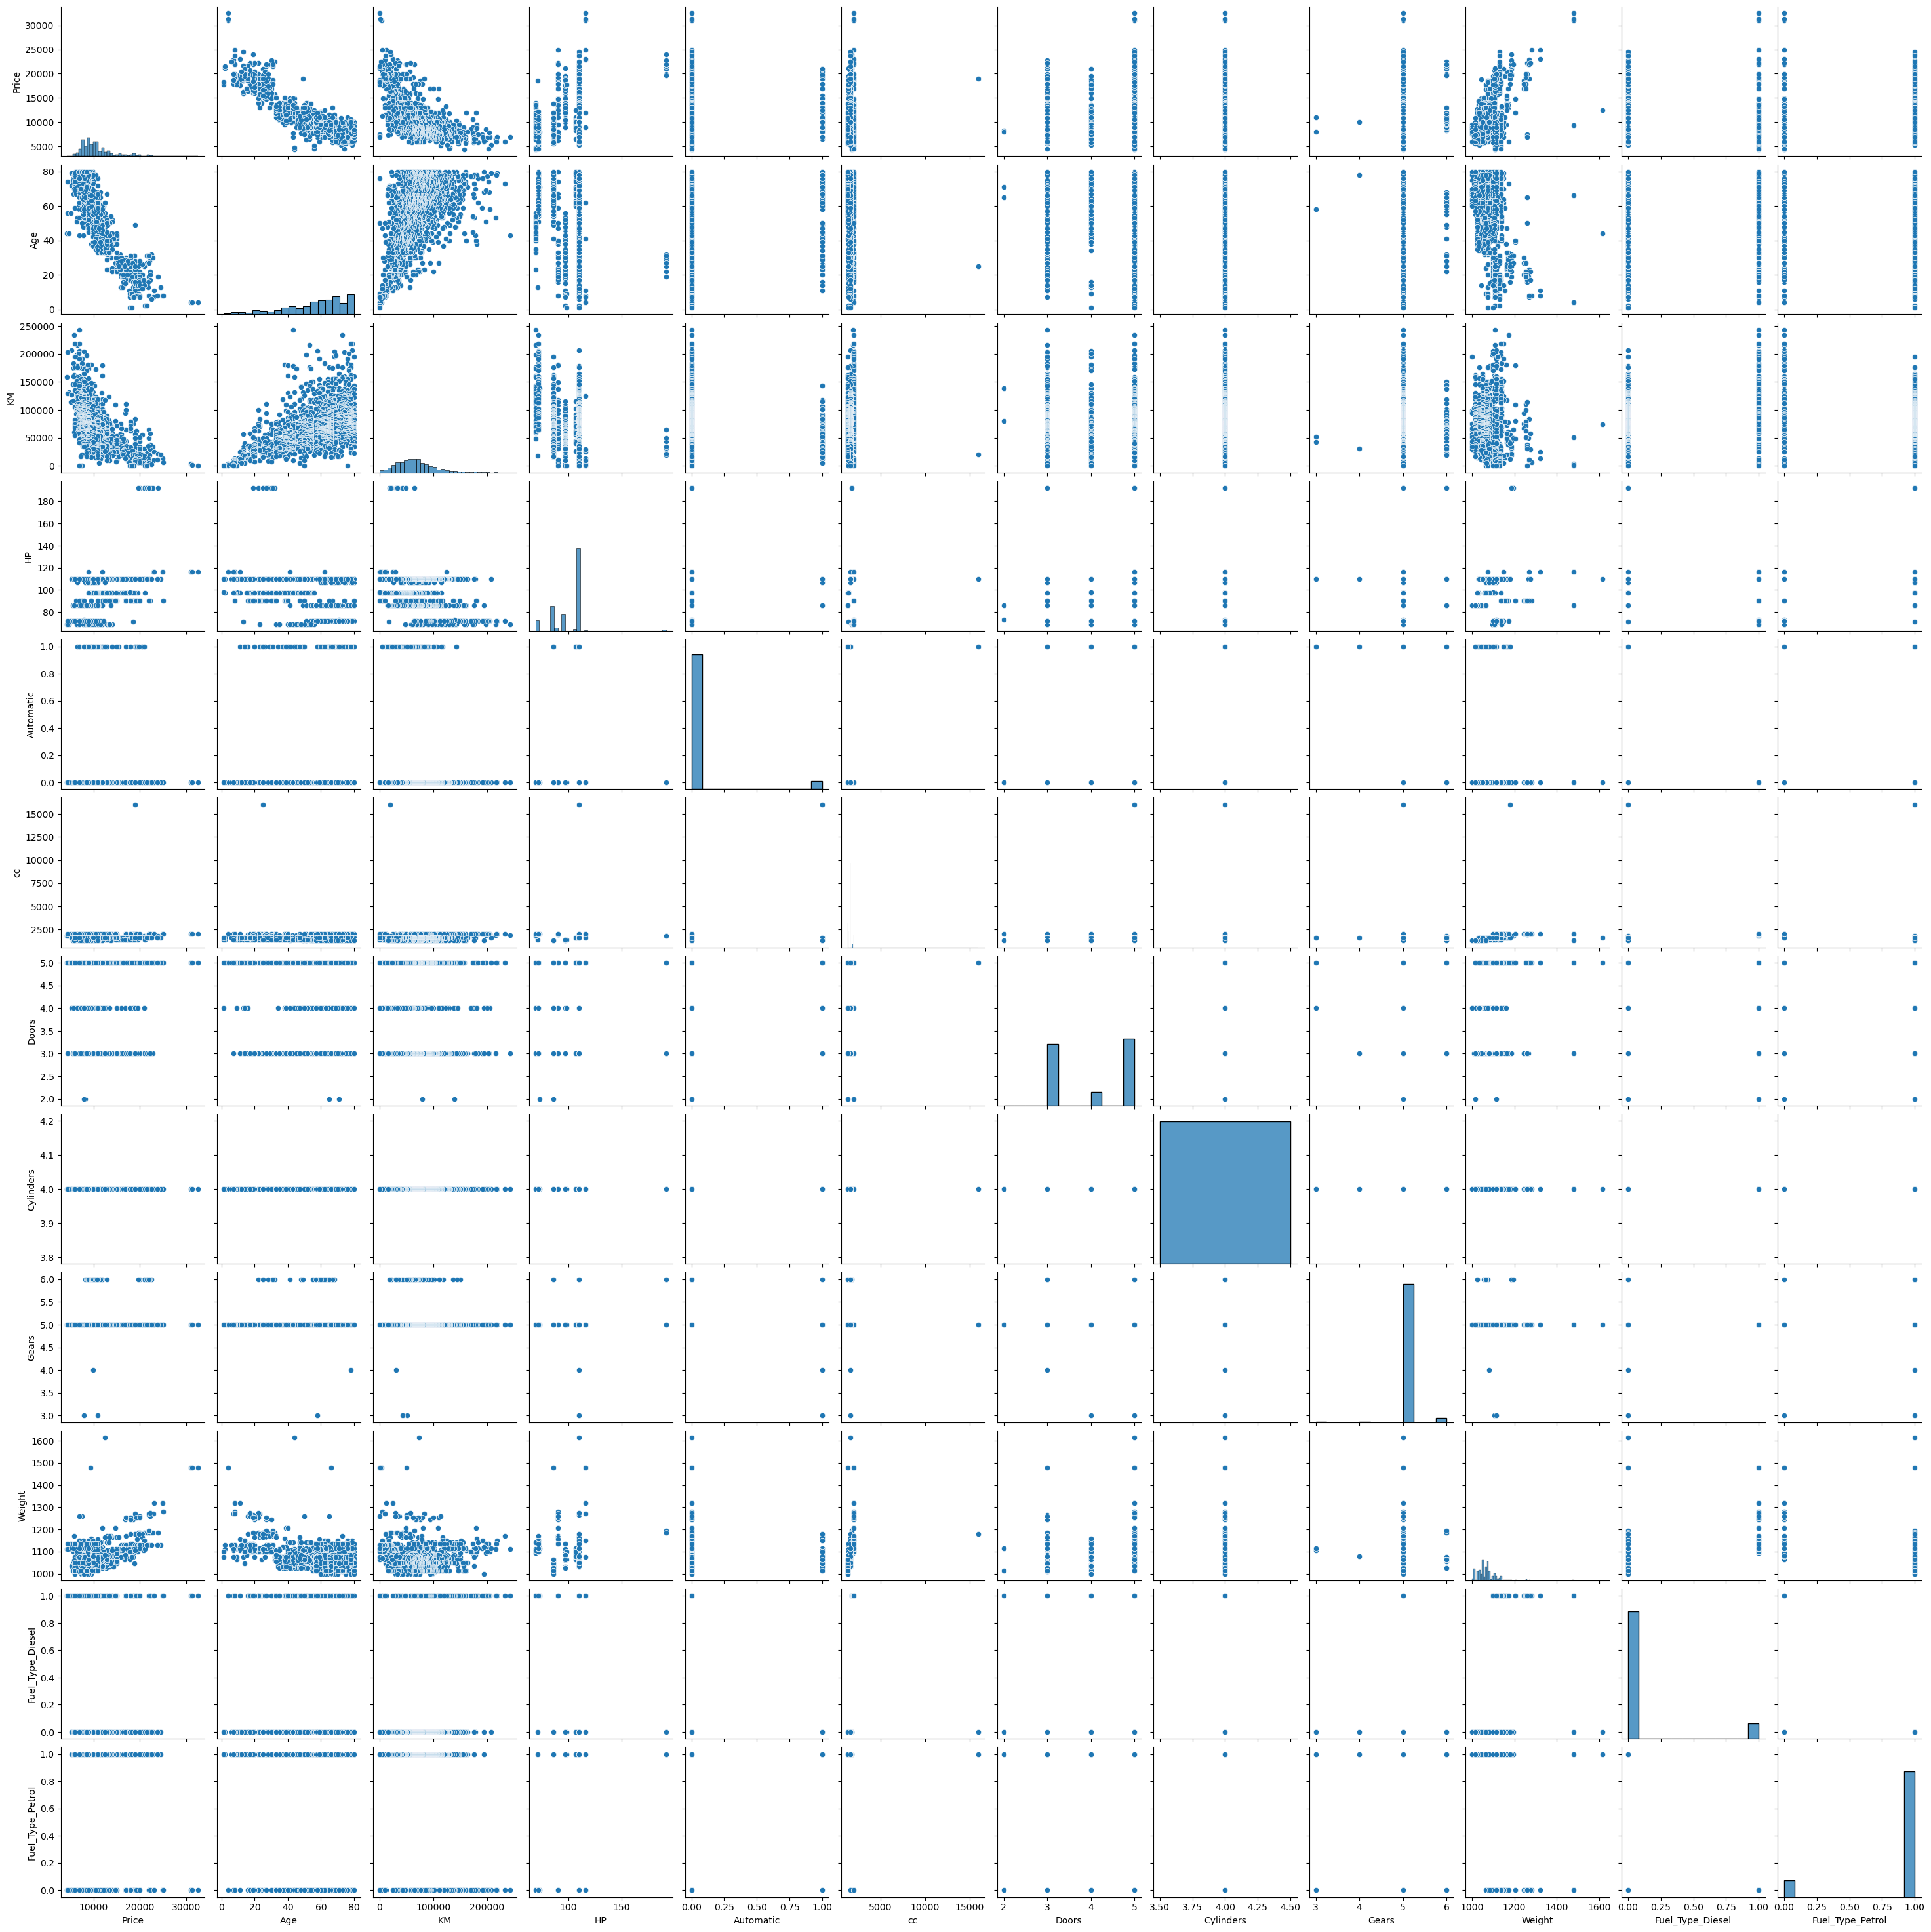

In [35]:
# Pairplot to visualize relationships between variables
sns.pairplot(df)
plt.show()

In [36]:
# 2.Split the dataset into training and testing sets (e.g., 80% training, 20% testing).
# Define the feature matrix (X) and target vector (y)
X = df.drop('Price', axis=1)
y = df['Price']

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the train and test sets
print(f'Training set shape: {X_train.shape}')
print(f'Testing set shape: {X_test.shape}')

Training set shape: (1148, 11)
Testing set shape: (288, 11)


In [39]:
# 3.Build a multiple linear regression model using the training dataset
# Model 1: Basic Linear Regression
model1 = LinearRegression()
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)

# Model 2: Feature Selection (use fewer features, e.g., based on correlation or p-values)
selected_features = ['Age', 'KM', 'HP', 'Weight']  # Adjust based on EDA
model2 = LinearRegression()
model2.fit(X_train[selected_features], y_train)
y_pred2 = model2.predict(X_test[selected_features])

# Model 3: Polynomial Regression (degree 2)
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

model3 = LinearRegression()
model3.fit(X_poly_train, y_train)
y_pred3 = model3.predict(X_poly_test)

# Evaluate the models
def evaluate_model(y_test, y_pred, model_name):
    mse = mean_squared_error(y_test, y_pred)
    rmse = round(mse ** 0.5,2)
    r2 = round(r2_score(y_test, y_pred),2)
    print(f'{model_name} - RMSE: {rmse}, R-squared: {r2}')

evaluate_model(y_test, y_pred1, "Model 1 (Basic Linear Regression)")
evaluate_model(y_test, y_pred2, "Model 2 (Feature Selection)")
evaluate_model(y_test, y_pred3, "Model 3 (Polynomial Regression)")


Model 1 (Basic Linear Regression) - RMSE: 1484.27, R-squared: 0.83
Model 2 (Feature Selection) - RMSE: 1411.85, R-squared: 0.85
Model 3 (Polynomial Regression) - RMSE: 1786.2, R-squared: 0.76


In [38]:
# 4 Evaluate the performance of the model 
# Model 2 seems to be the best model, with the lowest RMSE and the highest R-squared,
# indicating that focusing on key features improved prediction accuracy.
# Model 3 introduced more complexity but didn't improve performance, 
# which often happens if the model overfits the training data and doesn't generalize well to unseen data.

In [42]:
# 5.Apply Lasso and Ridge methods on the model.
# Lasso Regression
lasso = Lasso(alpha=0.1)  # Adjust alpha for regularization strength
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

# Ridge Regression
ridge = Ridge(alpha=1)  # Adjust alpha for regularization strength
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

# Evaluate Lasso and Ridge models
evaluate_model(y_test, y_pred_lasso, "Lasso Regression")
evaluate_model(y_test, y_pred_ridge, "Ridge Regression")

Lasso Regression - RMSE: 1484.0, R-squared: 0.83
Ridge Regression - RMSE: 1483.15, R-squared: 0.84


In [43]:
# Lasso Regression: The performance is very close to the basic linear regression model,
# with only a slight reduction in R-squared and similar RMSE. Lasso tends to shrink 
# coefficients, but it doesn't seem to have significantly improved the model here.

# Ridge Regression: This model performed slightly better than Lasso and the basic model,
# with a marginally lower RMSE and a slightly higher R-squared value. 
# Ridge regularization can help with multicollinearity and stabilize the coefficients without completely zeroing them out.

In [ ]:
# Interview Questions

# 1. Normalization & Standardization

# - Normalization: Scales features to a fixed range, like [0, 1]. It's helpful for algorithms that need features to be on the same scale, ensuring that no feature disproportionately affects the outcome due to its scale.

# - Standardization: Centers features around a mean of 0 and scales them by their standard deviation. This is useful when features have different units or distributions, making it easier for algorithms to process them effectively.

# Benefits:
# - Both methods ensure that all features contribute equally to the model, improving performance and stability.

# 2. Addressing Multicollinearity

# - Remove Correlated Predictors: If two or more features are highly correlated, removing one can reduce redundancy.

# - Principal Component Analysis (PCA): Transforms features into a set of uncorrelated components, reducing multicollinearity.

# - Regularization: Techniques like Ridge or Lasso regression add penalties to the size of coefficients, which can help manage multicollinearity by shrinking some coefficients.

# - Variance Inflation Factor (VIF): Measures how much the variance of an estimated regression coefficient increases due to multicollinearity. High VIF values indicate problematic multicollinearity.

# - Combine Predictors: Merging highly correlated features into a single feature can simplify the model.

# - Increase Sample Size: Sometimes adding more data can help reduce the effects of multicollinearity.